In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%pylab inline
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product

Populating the interactive namespace from numpy and matplotlib


C:\Users\Mi\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['product']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [20]:
milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)

данные по ежемесячному уровню производства молока в фунтах на одну корову

In [21]:
milk

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


создали новый ряд значений среднего дневного уровня производства молока в фунтах на одну корову, поделив на число дней в месяце

In [22]:
milk['daily'] = milk['milk']/milk.index.days_in_month

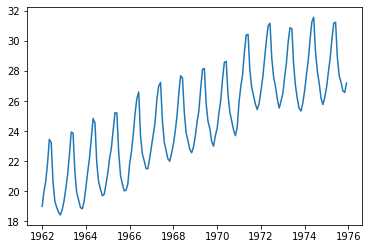

In [23]:
plt.plot(milk['daily'])

Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерия Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным.

Критерий Дики-Фуллера: p=0.064301


<Figure size 1080x720 with 0 Axes>

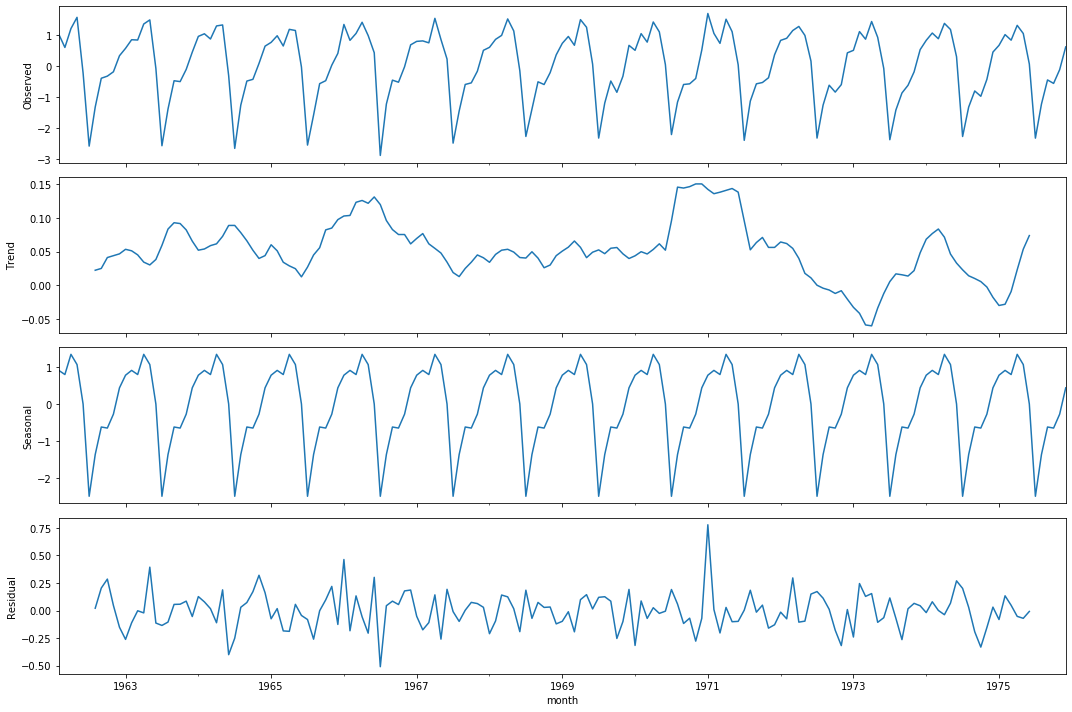

In [26]:
milk['daily_diff1'] = milk.daily - milk.daily.shift(1)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(milk.daily_diff1.dropna()).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(milk.daily_diff1.dropna())[1])

Критерий Дики-Фуллера: p=0.221277


<Figure size 1080x720 with 0 Axes>

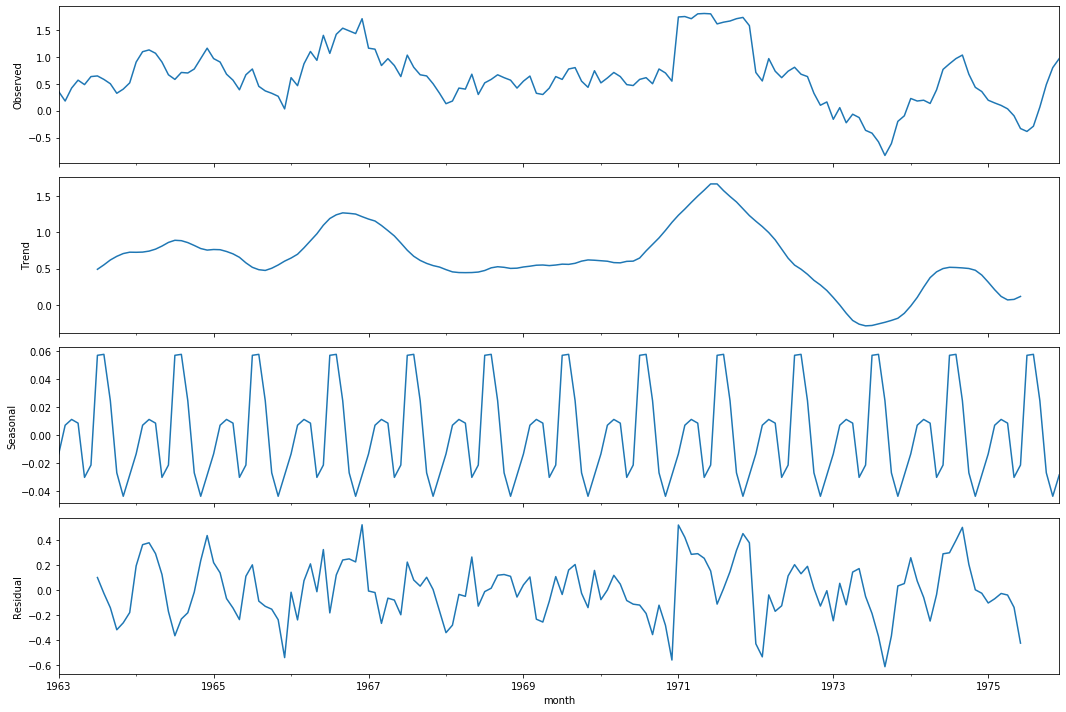

In [27]:
milk['daily_diff12'] = milk.daily - milk.daily.shift(12)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(milk.daily_diff12.dropna()).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(milk.daily_diff12.dropna())[1])

Критерий Дики-Фуллера: p=0.000002


<Figure size 1080x720 with 0 Axes>

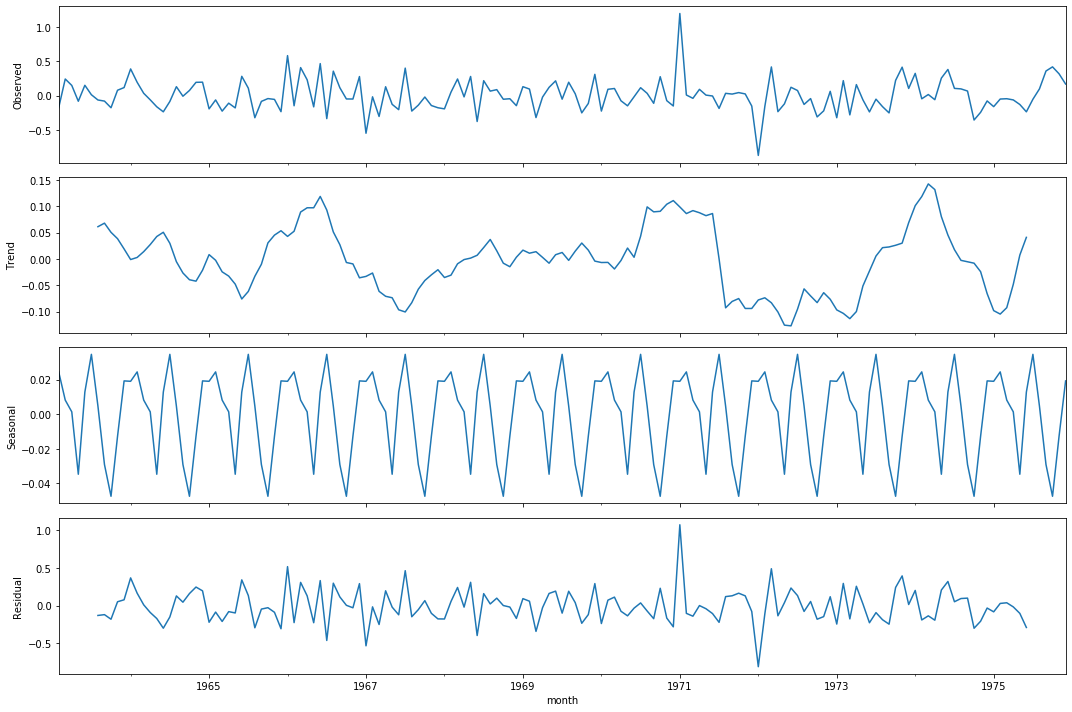

In [28]:
milk['daily_diff2'] = milk.daily_diff12 - milk.daily_diff12.shift(1)
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(milk.daily_diff2.dropna()).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(milk.daily_diff2.dropna())[1])

Для стационарного ряда из предыдущего вопроса построили график автокорреляционной функции.

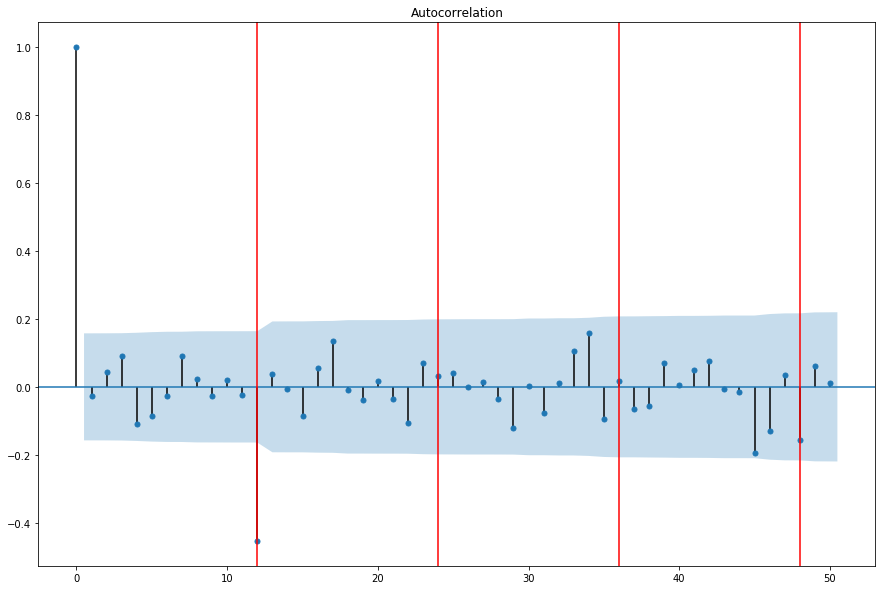

In [32]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(milk.daily_diff2.dropna().values.squeeze(), lags=50)
for i in range(12, 60, 12):
    plt.axvline(i, -0.3, 1, c='r')
pylab.show()

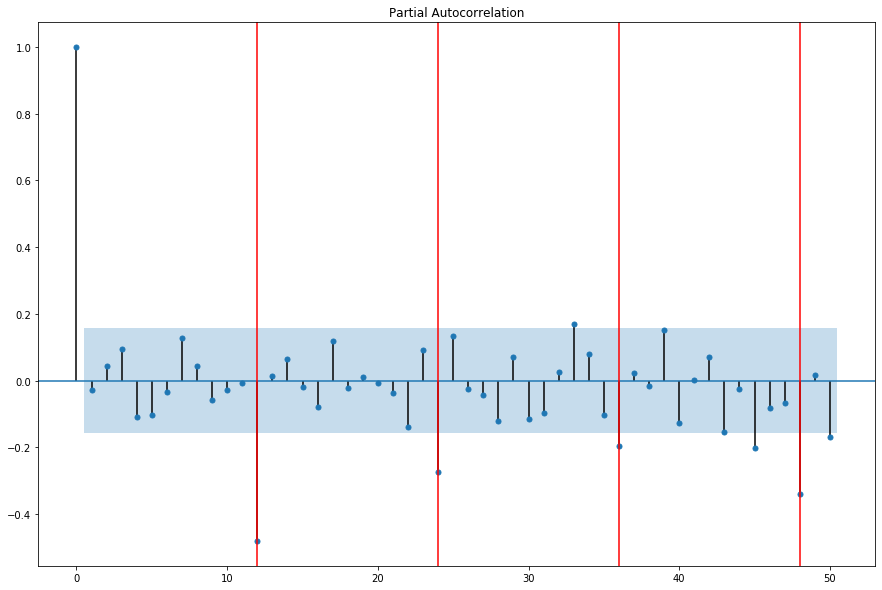

In [33]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(milk.daily_diff2.dropna().values.squeeze(), lags=50)
for i in range(12, 60, 12):
    plt.axvline(i, -0.3, 1, c='r')
pylab.show()